# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 573
['port-aux-francais', 'petropavlovsk-kamchatsky', 'vila franca do campo', 'longyearbyen', 'vadso', 'alice springs', 'edinburgh of the seven seas', 'selfoss', 'albany', 'namtsy', 'margaret river', 'georgetown', 'tolanaro', 'taiohae', 'taquaritinga do norte', 'enewetak', 'ushuaia', 'yellowknife', 'la ronge', 'bargara', 'olovyannaya', 'lihue', 'mount pearl', 'inhambane', 'horta', 'tazovsky', 'caburan', 'ust-tsilma', 'manismata', 'kingston', 'port elizabeth', 'vilyuchinsk', 'mana', 'adamstown', 'thompson', 'fort bragg', 'bethel', 'pisco', 'tranovaho', 'lompoc', 'kapuskasing', 'papatowai', 'waitangi', 'katsuura', 'hermanus', 'kudymkar', 'glace bay', 'callao', 'stanley', 'bandarbeyla', 'maubara', 'puranpur', 'carloforte', 'hongwon', 'lebu', 'ambodifotatra', 'hamada', 'montella', 'trincomalee', 'hithadhoo', 'crane', 'cartagena del chaira', 'grytviken', 'iqaluit', 'yima', 'hawaiian paradise park', 'blackmans bay', 'hadibu', 'takamaka', 'aasiaat', 'puerto baque

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | petropavlovsk-kamchatsky
Processing Record 3 of Set 1 | vila franca do campo
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | vadso
Processing Record 6 of Set 1 | alice springs
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | selfoss
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | namtsy
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | tolanaro
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | taquaritinga do norte
Processing Record 16 of Set 1 | enewetak
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | la ronge
Processing Record 20 of Set 1 | bargara
City not found. Skippin

Processing Record 39 of Set 4 | sitka
Processing Record 40 of Set 4 | port glaud
City not found. Skipping...
Processing Record 41 of Set 4 | manokwari
Processing Record 42 of Set 4 | new norfolk
Processing Record 43 of Set 4 | urucui
Processing Record 44 of Set 4 | saipan
Processing Record 45 of Set 4 | badger
Processing Record 46 of Set 4 | sungailiat
Processing Record 47 of Set 4 | frederico westphalen
Processing Record 48 of Set 4 | rongelap
Processing Record 49 of Set 4 | ndelele
Processing Record 0 of Set 5 | kendari
Processing Record 1 of Set 5 | praia da vitoria
Processing Record 2 of Set 5 | mangai
Processing Record 3 of Set 5 | richards bay
Processing Record 4 of Set 5 | crucecita
Processing Record 5 of Set 5 | colonia
Processing Record 6 of Set 5 | uttaradit
Processing Record 7 of Set 5 | saldanha
Processing Record 8 of Set 5 | margate
Processing Record 9 of Set 5 | isafjordur
Processing Record 10 of Set 5 | maibong
Processing Record 11 of Set 5 | invercargill
Processing Reco

City not found. Skipping...
Processing Record 27 of Set 8 | chibougamau
Processing Record 28 of Set 8 | tagta
Processing Record 29 of Set 8 | illizi
Processing Record 30 of Set 8 | jijiga
Processing Record 31 of Set 8 | daru
Processing Record 32 of Set 8 | ghadamis
Processing Record 33 of Set 8 | simanggang
Processing Record 34 of Set 8 | willard
Processing Record 35 of Set 8 | curanilahue
Processing Record 36 of Set 8 | kargasok
Processing Record 37 of Set 8 | paka
Processing Record 38 of Set 8 | zhangye
Processing Record 39 of Set 8 | sinop
Processing Record 40 of Set 8 | dabakala
Processing Record 41 of Set 8 | ndele
Processing Record 42 of Set 8 | zyrardow
Processing Record 43 of Set 8 | al hamul
Processing Record 44 of Set 8 | london
Processing Record 45 of Set 8 | mount gambier
Processing Record 46 of Set 8 | kalkaman
Processing Record 47 of Set 8 | balkanabat
Processing Record 48 of Set 8 | pontianak
Processing Record 49 of Set 8 | kailua-kona
Processing Record 0 of Set 9 | bika

Processing Record 19 of Set 12 | greenland
Processing Record 20 of Set 12 | cheongsong gun
Processing Record 21 of Set 12 | akureyri
Processing Record 22 of Set 12 | cape coast
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,3.44,87,99,17.71,TF,1698710458
1,petropavlovsk-kamchatsky,53.0452,158.6483,4.33,62,0,5.36,RU,1698710557
2,vila franca do campo,37.7167,-25.4333,19.23,99,21,3.49,PT,1698710497
3,longyearbyen,78.2186,15.6401,0.91,64,75,3.60,SJ,1698710558
4,vadso,70.0744,29.7487,-2.91,86,40,4.12,NO,1698710558


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.44,87,99,17.71,TF,1698710458
1,petropavlovsk-kamchatsky,53.0452,158.6483,4.33,62,0,5.36,RU,1698710557
2,vila franca do campo,37.7167,-25.4333,19.23,99,21,3.49,PT,1698710497
3,longyearbyen,78.2186,15.6401,0.91,64,75,3.60,SJ,1698710558
4,vadso,70.0744,29.7487,-2.91,86,40,4.12,NO,1698710558


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

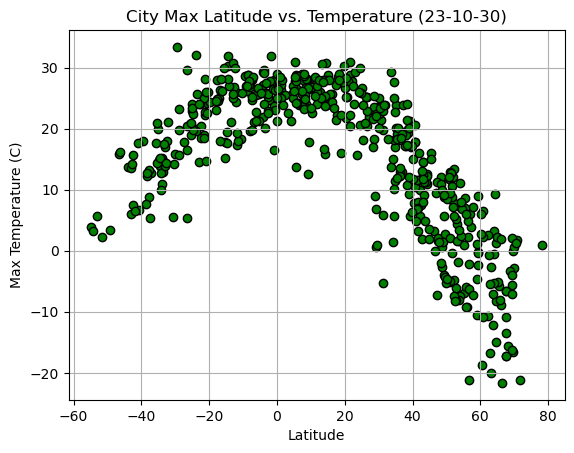

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolor="black", color="green", linewidths=1, marker="o", alpha=1, label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

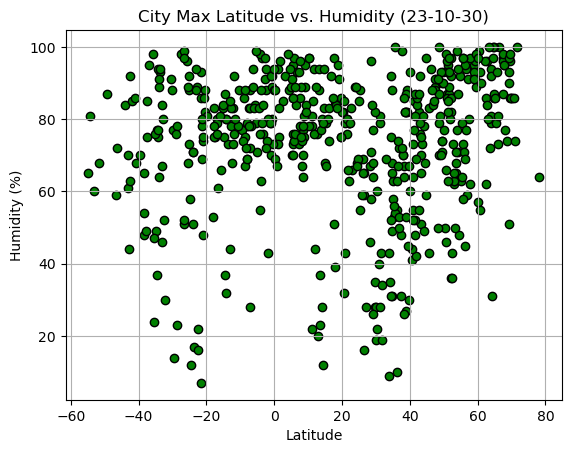

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolor="black", color="green", linewidths=1, marker="o", alpha=1, label="Cities")


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (%s)" % time.strftime("%y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

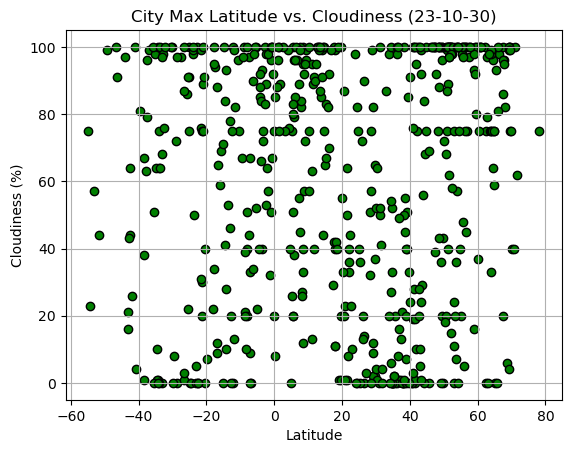

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolor="black", color="green", linewidths=1, marker="o", alpha=1, label="Cities")


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (%s)" % time.strftime("%y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

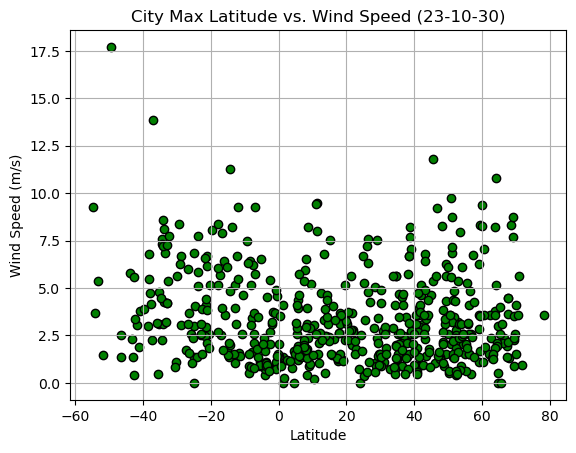

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolor="black", color="green", linewidths=1, marker="o", alpha=1, label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (%s)" % time.strftime("%y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    #calculation of Linear Regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq =  "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    #Plot Linear Regression
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared value is: {rvalue**2}")
    print(f"The r value is: {rvalue}")
    plt.show()

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,petropavlovsk-kamchatsky,53.0452,158.6483,4.33,62,0,5.36,RU,1698710557
2,vila franca do campo,37.7167,-25.4333,19.23,99,21,3.49,PT,1698710497
3,longyearbyen,78.2186,15.6401,0.91,64,75,3.60,SJ,1698710558
4,vadso,70.0744,29.7487,-2.91,86,40,4.12,NO,1698710558
7,selfoss,63.9331,-20.9971,-0.53,79,33,3.77,IS,1698710559


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.44,87,99,17.71,TF,1698710458
5,alice springs,-23.7000,133.8833,25.75,17,50,7.72,AU,1698710486
6,edinburgh of the seven seas,-37.0676,-12.3116,12.76,95,99,13.85,SH,1698710559
10,margaret river,-33.9500,115.0667,13.91,64,64,4.26,AU,1698710559
12,tolanaro,-25.0319,46.9987,24.04,88,75,0.00,MG,1698710560


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.7370798614157655
The r value is: -0.8585335528770938


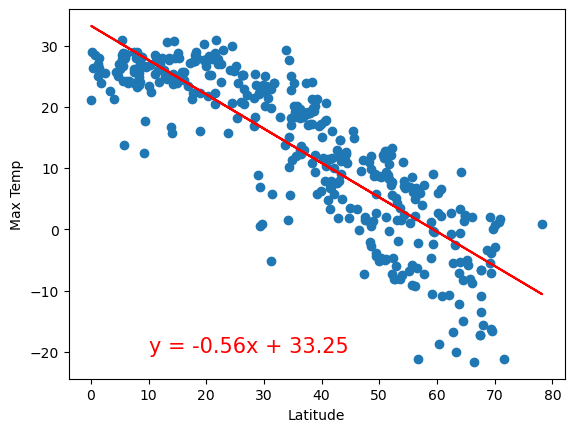

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (10, -20) )

The r-squared value is: 0.5717544151774021
The r value is: 0.7561444406840548


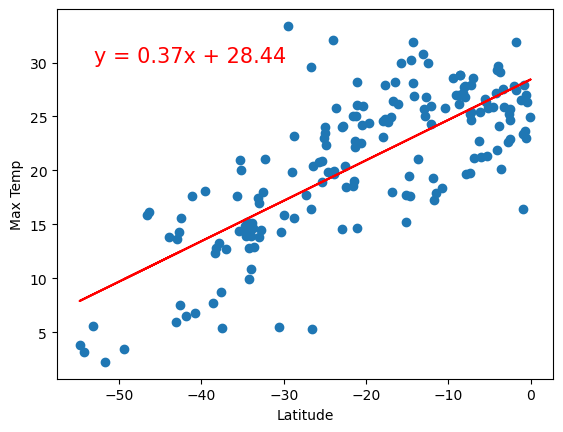

In [39]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-53, 30))

Latitude is a pretty good predictor of temperature in the Northern Hempisphere. As you go further north from the equator, temperatures tend to drop.
About 73.71% of the changes in maximum temperature can be explained by changes in latitude in the Northern Hemisphere.

As you move closer to the equator from the South Pole, temperatures tend to rise.
About 57.18% of the changes in maximum temperature can be explained by changes in latitude in the Southern Hemisphere. It's not as strong as in the Northern Hemisphere, but still, latitude does a decent job of predicting temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.013192164143558501
The r value is: 0.11485714668038076


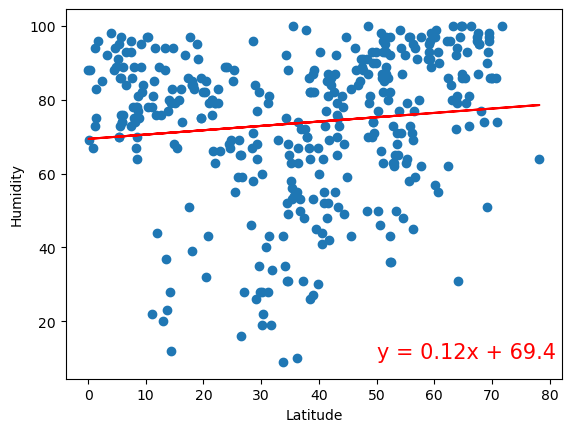

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (50, 10) )

The r-squared value is: 0.040543873173909166
The r value is: 0.20135509224727635


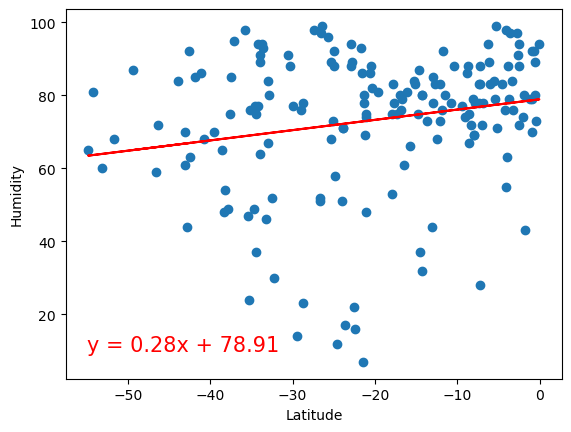

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-55, 10))

The linear relationship between humidity and latitude are not strong in either hemisphere. Meaning latitude is not a reasonable way to determine how humid a place will be. In both hemispheres the R value, and r squared values presented are not statistically significant enough to provide us with a positive or negative linear regression. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.007334497144399354
The r value is: 0.08564167878083284


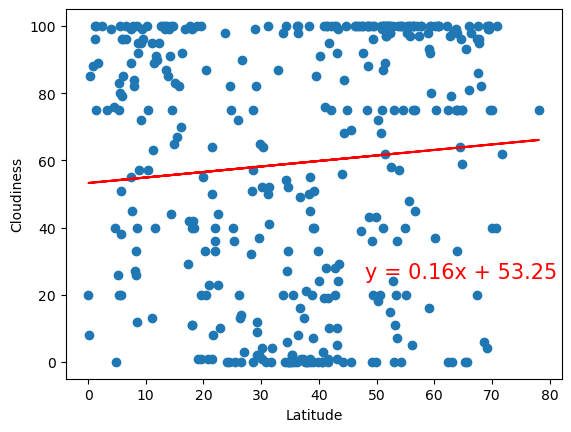

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (48, 25) )

The r-squared value is: 0.008387990315111038
The r value is: 0.09158597226164626


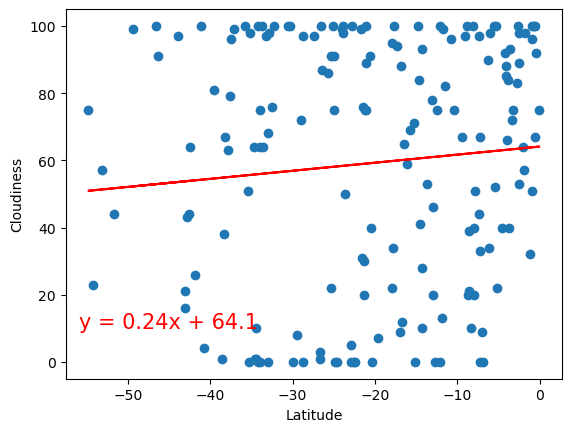

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-56, 10))

**Discussion about the linear relationship:** 


In both the Northern and Southern Hemisphere, when we look at how latitude relates to cloudiness we observe a very weak connection. Cloudiness might slightly increase as you move away from the equator towards the North Pole, but it's not a strong correlation.
In the Norther hemisphere only about 0.73% of the changes in cloudiness can be explained by changes in latitude, and in the Southern Hemisphere only about .83%. Latitude is not a good indicator for how cloudy a place will be. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.011703753040206783
The r value is: 0.10818388530740973


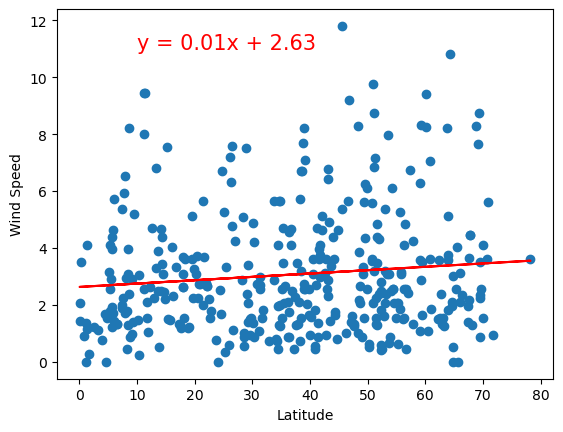

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10, 11) )

The r-squared value is: 0.08029802756615928
The r value is: -0.2833690660007886


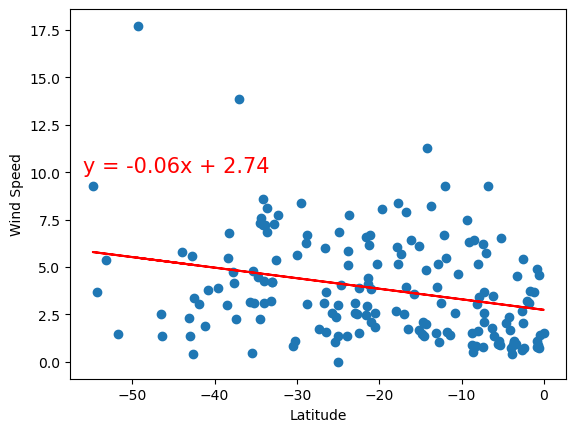

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-56, 10))

**Discussion about the linear relationship:** 


In the Northern Hemisphere, there's a very weak connection between latitude and wind speed.
Only about 1.17% of changes in wind speed can be explained by changes in latitude. So, latitude doesn't really tell us much about wind speed here.

In the Southern Hemisphere, there's also a weak connection between latitude and wind speed. Wind speed tends to drop slightly as you move from the equator to the South Pole.
About 8.03% of changes in wind speed can be explained by latitude. It's a bit better than in the Northern Hemisphere, but still not a strong link.

The connection is slightly stronger in the southern hemisphere, but overall Latitude isn't a good predictor of wind speed in either hemisphere.